In [88]:
import pandas as pd
import numpy as np
path='/content/reviews_dataset.csv'
df=pd.read_csv(path)


In [89]:
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
1,Ilteeza Islam,My little brother is using it . His mother lov...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
2,Zaneera,I've always used sebamed products for my kid. ...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
3,ANJALI SHENISHETTY,Great soaps for kids. Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21"


In [90]:
df.columns

Index(['name', 'description', 'rating', 'likes_count', 'verified', 'images',
       'reviewed_at', '_id', 'crawled_at'],
      dtype='object')

In [91]:
df.isnull().sum()

name              0
description       0
rating            0
likes_count       0
verified          0
images         2377
reviewed_at       0
_id               0
crawled_at        0
dtype: int64

In [92]:
len(df)

3222

In [93]:
df.describe()

,rating,likes_count
count,3222.000000,3222.000000
mean,4.683116,0.804159
std,0.736561,3.217435
min,1.000000,0.000000
25%,5.000000,0.000000
50%,5.000000,0.000000
75%,5.000000,0.000000
max,5.000000,100.000000


In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Sentiment Analysis

In [95]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [96]:
df.dtypes

name           object
description    object
rating          int64
likes_count     int64
verified         bool
images         object
reviewed_at    object
_id            object
crawled_at     object
dtype: object

In [97]:
df['description'].head()

0                                    Super I loved it 
1    My little brother is using it . His mother lov...
2    I've always used sebamed products for my kid. ...
3             Great soaps for kids. Smells amazing too
4                       Nice soap with mild properties
Name: description, dtype: object

In [98]:
df['description'].dtypes

dtype('O')

Removing the rows that has null values

In [99]:
df = df[~df['description'].isnull()]

In [100]:
df['length']=df['description'].apply(len)

Length after removing the rows where Review Text is null

In [101]:
len(df)

3222

**Removing puntuations**

In [102]:
import string
string.punctuation
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct
df['description']=df['description'].apply(lambda x: remove_punctuation(x))
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,length
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",17
1,Ilteeza Islam,My little brother is using it His mother love...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",53
2,Zaneera,Ive always used sebamed products for my kid No...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",65
3,ANJALI SHENISHETTY,Great soaps for kids Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",40
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",30


In [103]:
ratings = df["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [104]:
figure = px.pie(df, values=quantity, names=numbers,hole = 0.5)
figure.show()

**Text blob for polarity**

Using polarity we can classifity the reviews as Positive, Negative, or Neutral.

In [105]:
from textblob import TextBlob
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,length
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",17
1,Ilteeza Islam,My little brother is using it His mother love...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",53
2,Zaneera,Ive always used sebamed products for my kid No...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",65
3,ANJALI SHENISHETTY,Great soaps for kids Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",40
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",30


In [106]:
df["Polarity"] = df["description"].apply(lambda x: TextBlob(x).sentiment.polarity)

In [107]:
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,length,Polarity
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",17,0.516667
1,Ilteeza Islam,My little brother is using it His mother love...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",53,-0.187500
2,Zaneera,Ive always used sebamed products for my kid No...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",65,0.000000
3,ANJALI SHENISHETTY,Great soaps for kids Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",40,0.700000
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",30,0.466667


In [108]:
df['Polarity'].min()

-1.0

In [109]:
df['Polarity'].mean()

0.36416919702260997

In [110]:
import plotly.express as px

In [111]:
px.histogram(df, x='Polarity', opacity = 0.5)

**Plot based on rating**

In [112]:
px.histogram(df, x='Polarity',color="rating", opacity = 0.5)

In [113]:
def getAnalysis(polarity):
  if polarity < 0:
    return 'Negative'
  elif polarity == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [114]:
 df['TextBlob_Analysis']=df['Polarity'].apply(getAnalysis)

In [115]:
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,length,Polarity,TextBlob_Analysis
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",17,0.516667,Positive
1,Ilteeza Islam,My little brother is using it His mother love...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",53,-0.187500,Negative
2,Zaneera,Ive always used sebamed products for my kid No...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",65,0.000000,Neutral
3,ANJALI SHENISHETTY,Great soaps for kids Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",40,0.700000,Positive
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",30,0.466667,Positive


In [116]:
polarity_plot=df['TextBlob_Analysis'].value_counts()

In [117]:
polarity_plot

Positive    2772
Neutral      282
Negative     168
Name: TextBlob_Analysis, dtype: int64

**Pie Chart for polarity**

In [118]:
positive= 2772/len(df)*100
negative= 282/len(df)*100
neutral= 168/len(df)*100

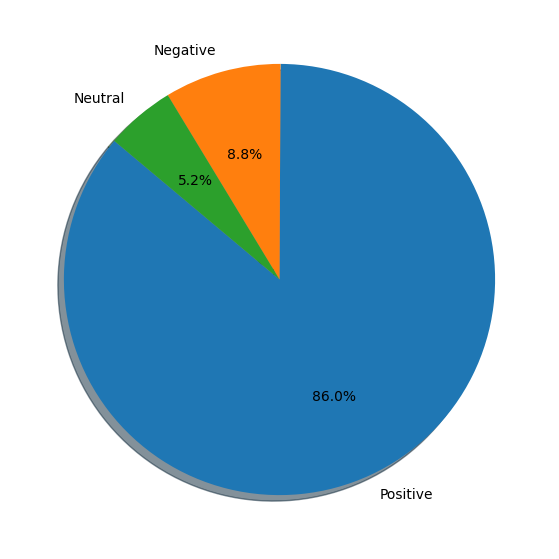

In [119]:
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive, negative, neutral]
plt.figure(figsize=(12,7))
plt.pie(sizes, labels=labels,autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

***Label Encoding***

In [120]:
 #Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Encoded_value']= label_encoder.fit_transform(df['TextBlob_Analysis'])

df['Encoded_value'].unique()

array([2, 0, 1])

In [121]:
df.head(5)

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,length,Polarity,TextBlob_Analysis,Encoded_value
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",17,0.516667,Positive,2
1,Ilteeza Islam,My little brother is using it His mother love...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",53,-0.187500,Negative,0
2,Zaneera,Ive always used sebamed products for my kid No...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",65,0.000000,Neutral,1
3,ANJALI SHENISHETTY,Great soaps for kids Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",40,0.700000,Positive,2
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",30,0.466667,Positive,2


In [122]:
df[df['TextBlob_Analysis']=='Negative']['Encoded_value'].head()

1      0
40     0
201    0
209    0
210    0
Name: Encoded_value, dtype: int64

# ***Word Cloud***

we are splitting the dataframe based on the negative and positive reviews. To generate a word cloud of word which has a positive impact, we are creating a 'for loop' that iterates in the review column.

***Splitting into two data frames***

In [123]:
df_positive = df[df["TextBlob_Analysis"] == "Positive"]
df_negative = df[df["TextBlob_Analysis"] == "Negative"]

In [124]:
df_negative['Polarity']=df_negative['Polarity'].astype(float)
df_positive['Polarity']=df_positive['Polarity'].astype(float)

In [125]:
df_positive.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,length,Polarity,TextBlob_Analysis,Encoded_value
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",17,0.516667,Positive,2
3,ANJALI SHENISHETTY,Great soaps for kids Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",40,0.700000,Positive,2
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",30,0.466667,Positive,2
5,Mahzooma Ibrahim,Fragrance is nice and as always a good product...,5,0,True,NaN,2019-11-29 11:05:46,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",61,0.650000,Positive,2
6,Archna Nangia,The soap is very gentle on the skinDoes not ma...,5,0,True,NaN,2021-07-27 00:17:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",64,0.096667,Positive,2


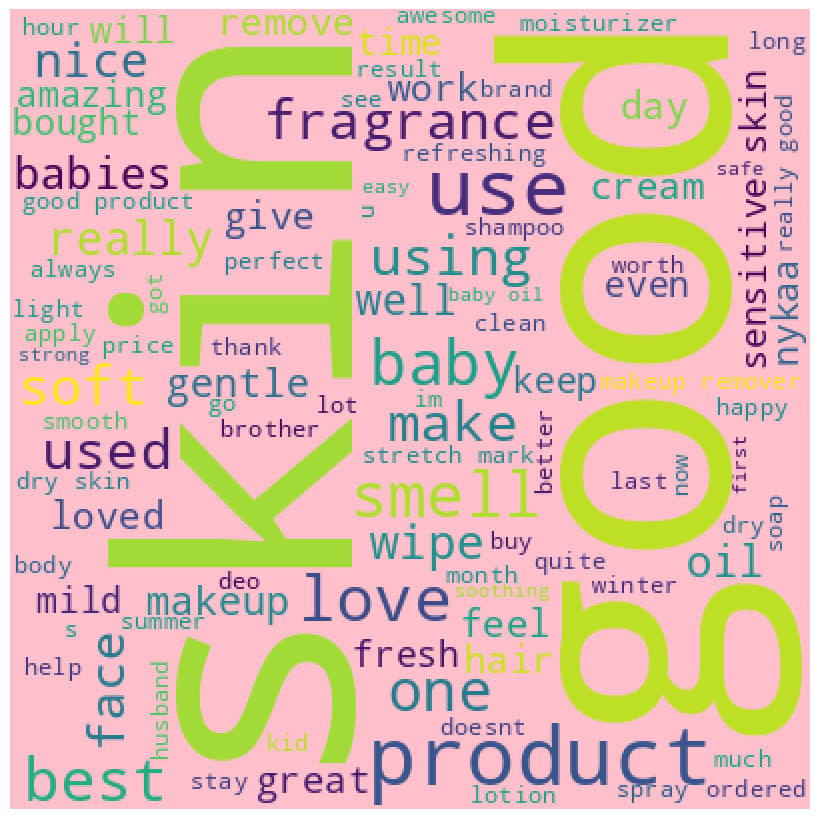

In [126]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)
# iterate through the csv file
for val in df_positive["description"]:
    # typecaste each val to string
    val = str(val)
    # split the value
    tokens = val.split()
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 400, height = 400,
                background_color ='pink',max_words=100,
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [127]:
df['Polarity']=df['Polarity'].astype(float)

# **Finding frequent positive and negative words**

In [128]:
df_negative.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,length,Polarity,TextBlob_Analysis,Encoded_value
1,Ilteeza Islam,My little brother is using it His mother love...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",53,-0.1875,Negative,0
40,DEEPTI CHETAN,I bought the bigger size after using the smal...,5,1,True,https://images-static.nykaa.com/prod-review/16...,2021-05-24 07:14:31,9ef12bed-3e21-52c0-b1b4-a6ecb8004997,"2021-07-31, 15:04:28",133,-0.0500,Negative,0
201,Samreena Begum,Works exclusively for delicate skin,4,0,True,https://images-static.nykaa.com/prod-review/16...,2021-02-24 20:14:55,159177a1-abc3-5a85-8897-f5de0a07754a,"2021-07-31, 15:05:44",36,-0.3000,Negative,0
209,mary sibiya,Iam really confused about the color of the soa...,1,0,True,NaN,2021-06-02 18:48:09,159177a1-abc3-5a85-8897-f5de0a07754a,"2021-07-31, 15:05:44",119,-0.2000,Negative,0
210,G. Bhargavi,Im not happy with this soap my baby color goin...,1,0,True,NaN,2021-05-03 12:06:09,159177a1-abc3-5a85-8897-f5de0a07754a,"2021-07-31, 15:05:44",84,-0.0500,Negative,0


In [129]:
import numpy as np
import nltk
from nltk import word_tokenize
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [130]:
df['description'] = df['description'].astype(str)

In [131]:
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  words= [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
  return words

In [132]:
df_positive['description'].apply(text_process)
df_positive['description_cleaned']=df['description'].apply(text_process)

In [133]:
df_positive['description_cleaned']=df_positive['description_cleaned'].astype(str)

In [134]:
import heapq
from operator import itemgetter
from collections import Counter

def Top10(data,title=None):
    token_data= []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    for i in data:
        l = tokenizer.tokenize(i)
        token_data.append(l)
    corpus = []
    for i in token_data:
       for j in i:
         corpus.append(j)
    c = Counter(corpus)
    Di = dict(c)
    Top_10 = dict(heapq.nlargest(10, Di.items(), key=itemgetter(1)))
    dd = pd.DataFrame(Top_10.items(),columns=["word","frequency"])
    fig = plt.figure(1, figsize=(15, 15))
    plt.bar(range(len(Top_10)),Top_10.values(),align='center')
    plt.xticks(range(len(Top_10)), list(Top_10.keys()))
    plt.tick_params(axis="x",rotation=90)
    plt.tight_layout(pad = 0)
    if title==None:
        plt.title("Top 10 words")
    else:
        plt.title(title)
    return dd.head(10)

***Frequently used positive words***

,word,frequency
0,skin,1166
1,good,679
2,product,568
3,use,512
4,baby,420
5,makeup,353
6,fragrance,321
7,soft,281
8,using,266
9,oil,258


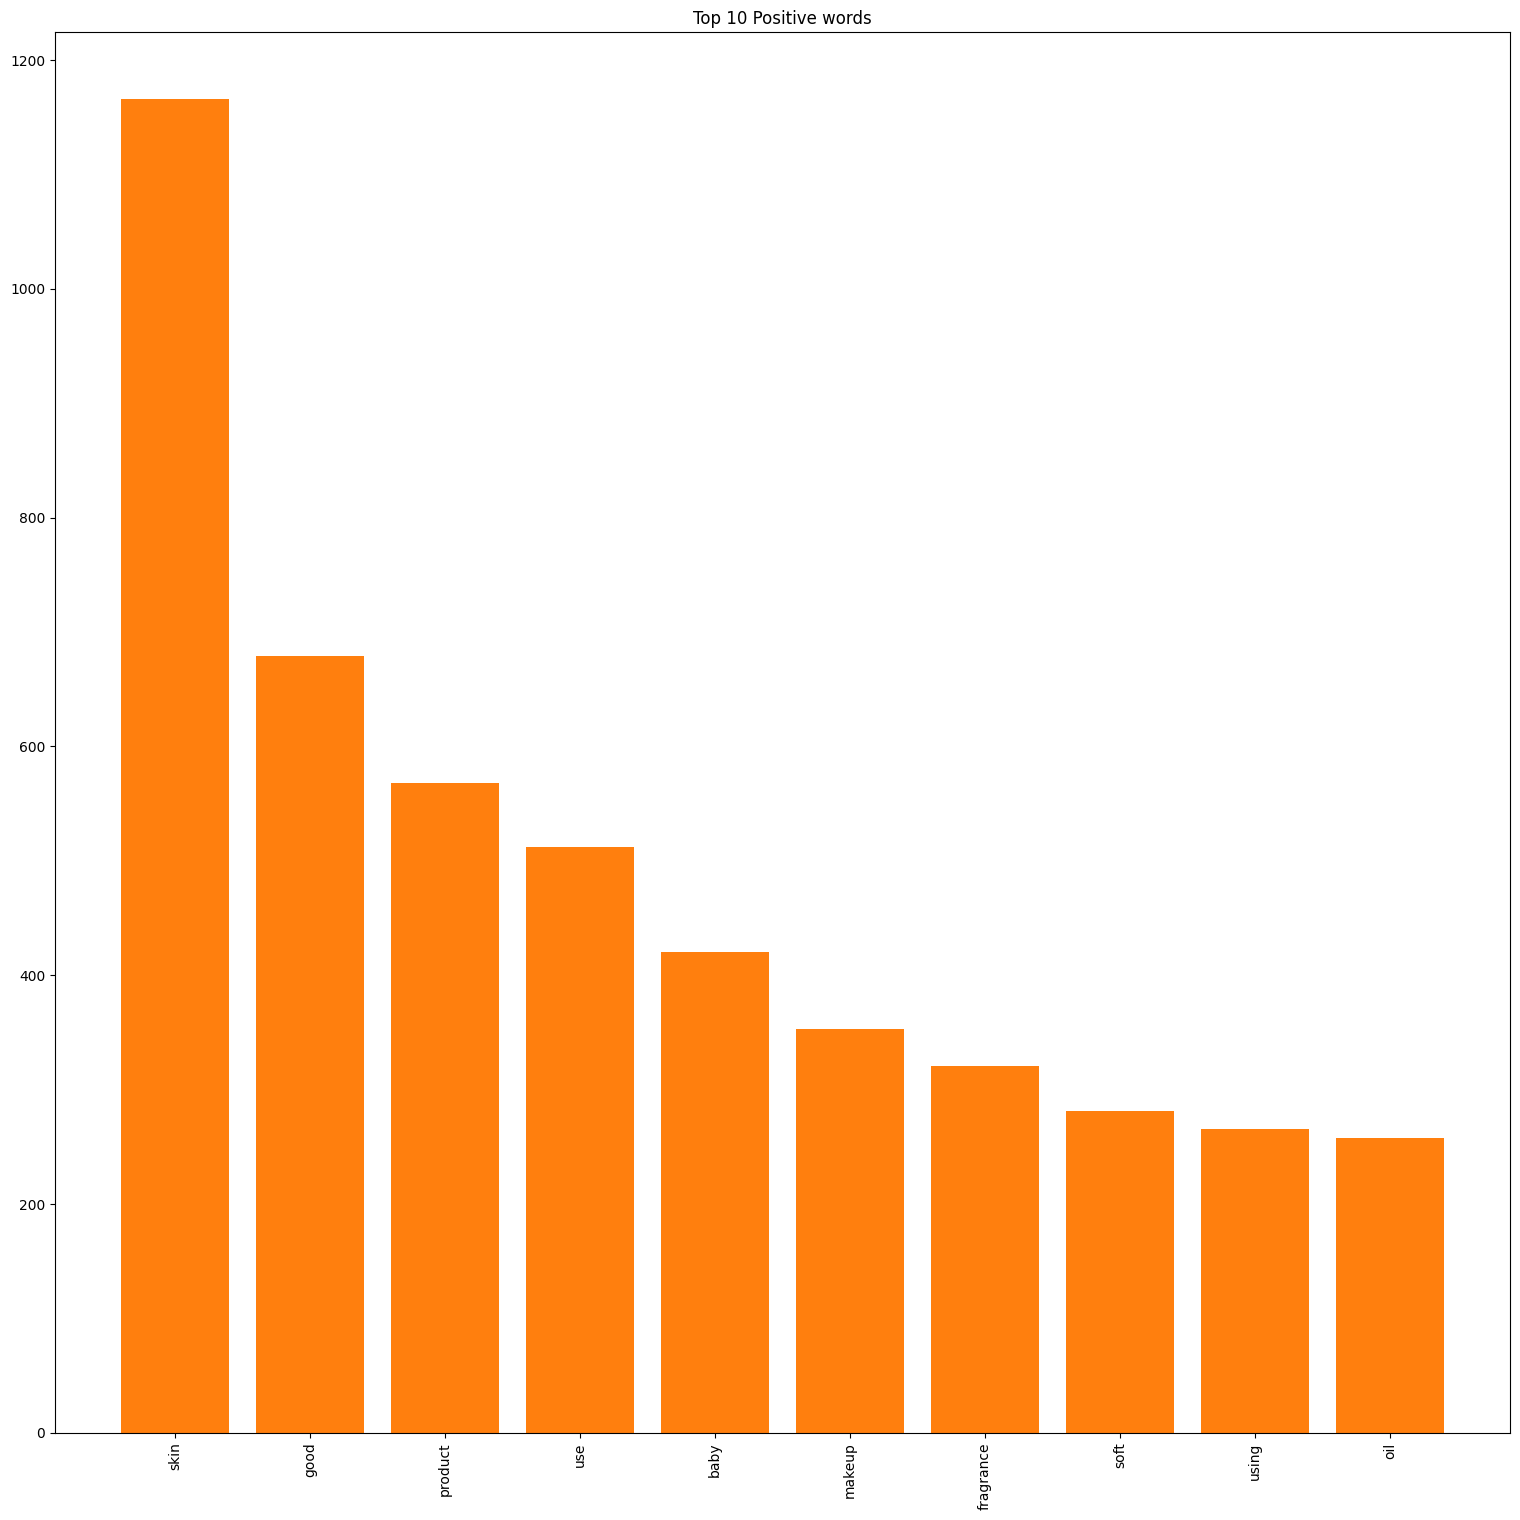

In [135]:
Top10(df_positive["description_cleaned"],title="Top 10 Positive words")
top_positive_words=Top10(df_positive["description_cleaned"],title="Top 10 Positive words")
top_positive_words

***Frequent negative words***

In [136]:
df_negative['description'].apply(text_process)
df_negative['description_cleaned']=df_negative['description'].apply(text_process)

In [137]:
df_negative['description_cleaned']=df_negative['description_cleaned'].astype(str)

,word,frequency
0,skin,78
1,use,38
2,using,29
3,product,27
4,dry,26
5,wipes,20
6,oil,18
7,well,18
8,baby,17
9,fragrance,17


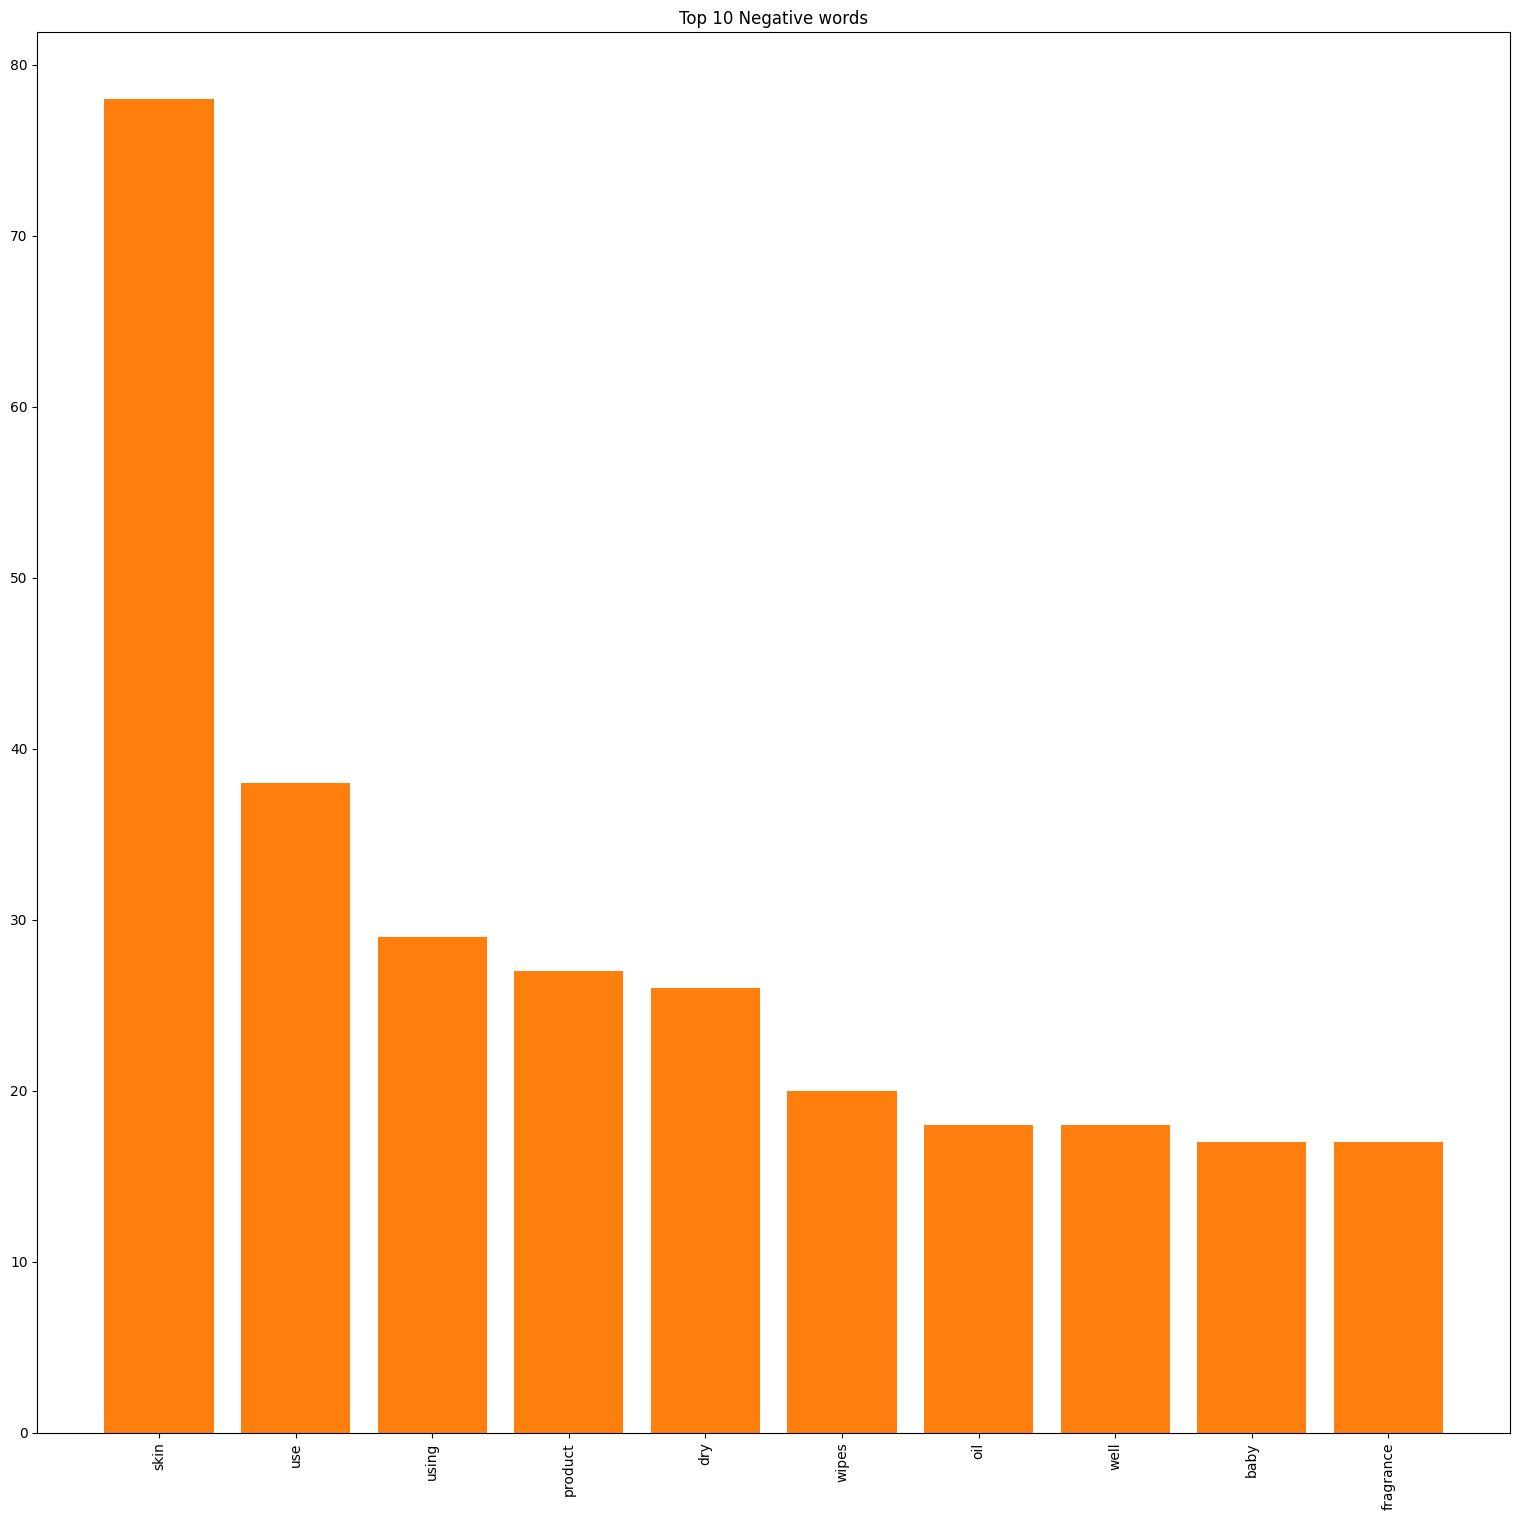

In [138]:
Top10(df_negative["description_cleaned"],title="Top 10 Negative words")
top_negative_words=Top10(df_negative["description_cleaned"],title="Top 10 Negative words")
top_negative_words

In [139]:
def text_preprocessing(words):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [w for w in tokenized_text if w not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

***Bi-grams***

In [140]:
df['description'].apply(text_process)
df['description_cleaned']=df['description'].apply(text_process)

In [141]:
df.head()

,name,description,rating,likes_count,verified,images,reviewed_at,_id,crawled_at,length,Polarity,TextBlob_Analysis,Encoded_value,description_cleaned
0,deepa shetty,Super I loved it,5,0,True,https://images-static.nykaa.com/prod-review/16...,2021-04-05 21:18:36,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",17,0.516667,Positive,2,"[Super, loved]"
1,Ilteeza Islam,My little brother is using it His mother love...,5,0,True,https://images-static.nykaa.com/prod-review/15...,2020-09-09 12:19:31,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",53,-0.187500,Negative,0,"[little, brother, using, mother, loves]"
2,Zaneera,Ive always used sebamed products for my kid No...,5,0,True,NaN,2021-01-08 17:18:56,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",65,0.000000,Neutral,1,"[Ive, always, used, sebamed, products, kid, di..."
3,ANJALI SHENISHETTY,Great soaps for kids Smells amazing too,5,1,True,NaN,2020-12-07 11:33:44,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",40,0.700000,Positive,2,"[Great, soaps, kids, Smells, amazing]"
4,K.Latha,Nice soap with mild properties,5,1,True,NaN,2020-06-24 13:44:32,cfd992f2-85bc-56a1-9577-1a8bd7ca6c82,"2021-07-31, 15:04:21",30,0.466667,Positive,2,"[Nice, soap, mild, properties]"


In [142]:
df['description_cleaned']=df['description_cleaned'].astype(str)

In [143]:
def Ngram(data,num,title=None):
    token_data= []
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    for i in data:
        n_grams = ngrams(tokenizer.tokenize(i), num)
        p = [ ' '.join(grams) for grams in  n_grams]
        token_data.append(p)
    corpus = []
    for i in token_data:
       for j in i:
         corpus.append(j)
    c = Counter(corpus)
    Di = dict(c)
    Top_10 = dict(heapq.nlargest(10, Di.items(), key=itemgetter(1)))
    dd = pd.DataFrame(Top_10.items(),columns=["word","frequency"])
    fig = plt.figure(1, figsize=(15, 15))
    plt.bar(range(len(Top_10)),Top_10.values(),align='center')
    plt.xticks(range(len(Top_10)), list(Top_10.keys()))
    plt.tick_params(axis="x",rotation=90)
    plt.tight_layout(pad = 0)
    if title==None:
        plt.title("Ngram")
    else:
        plt.title(title)
    return dd.head(10)

,word,frequency
0,sensitive skin,110
1,makeup remover,101
2,dry skin,95
3,stretch marks,95
4,remove makeup,77
5,use makeup,75
6,skin soft,59
7,makes skin,56
8,gentle skin,55
9,baby oil,49


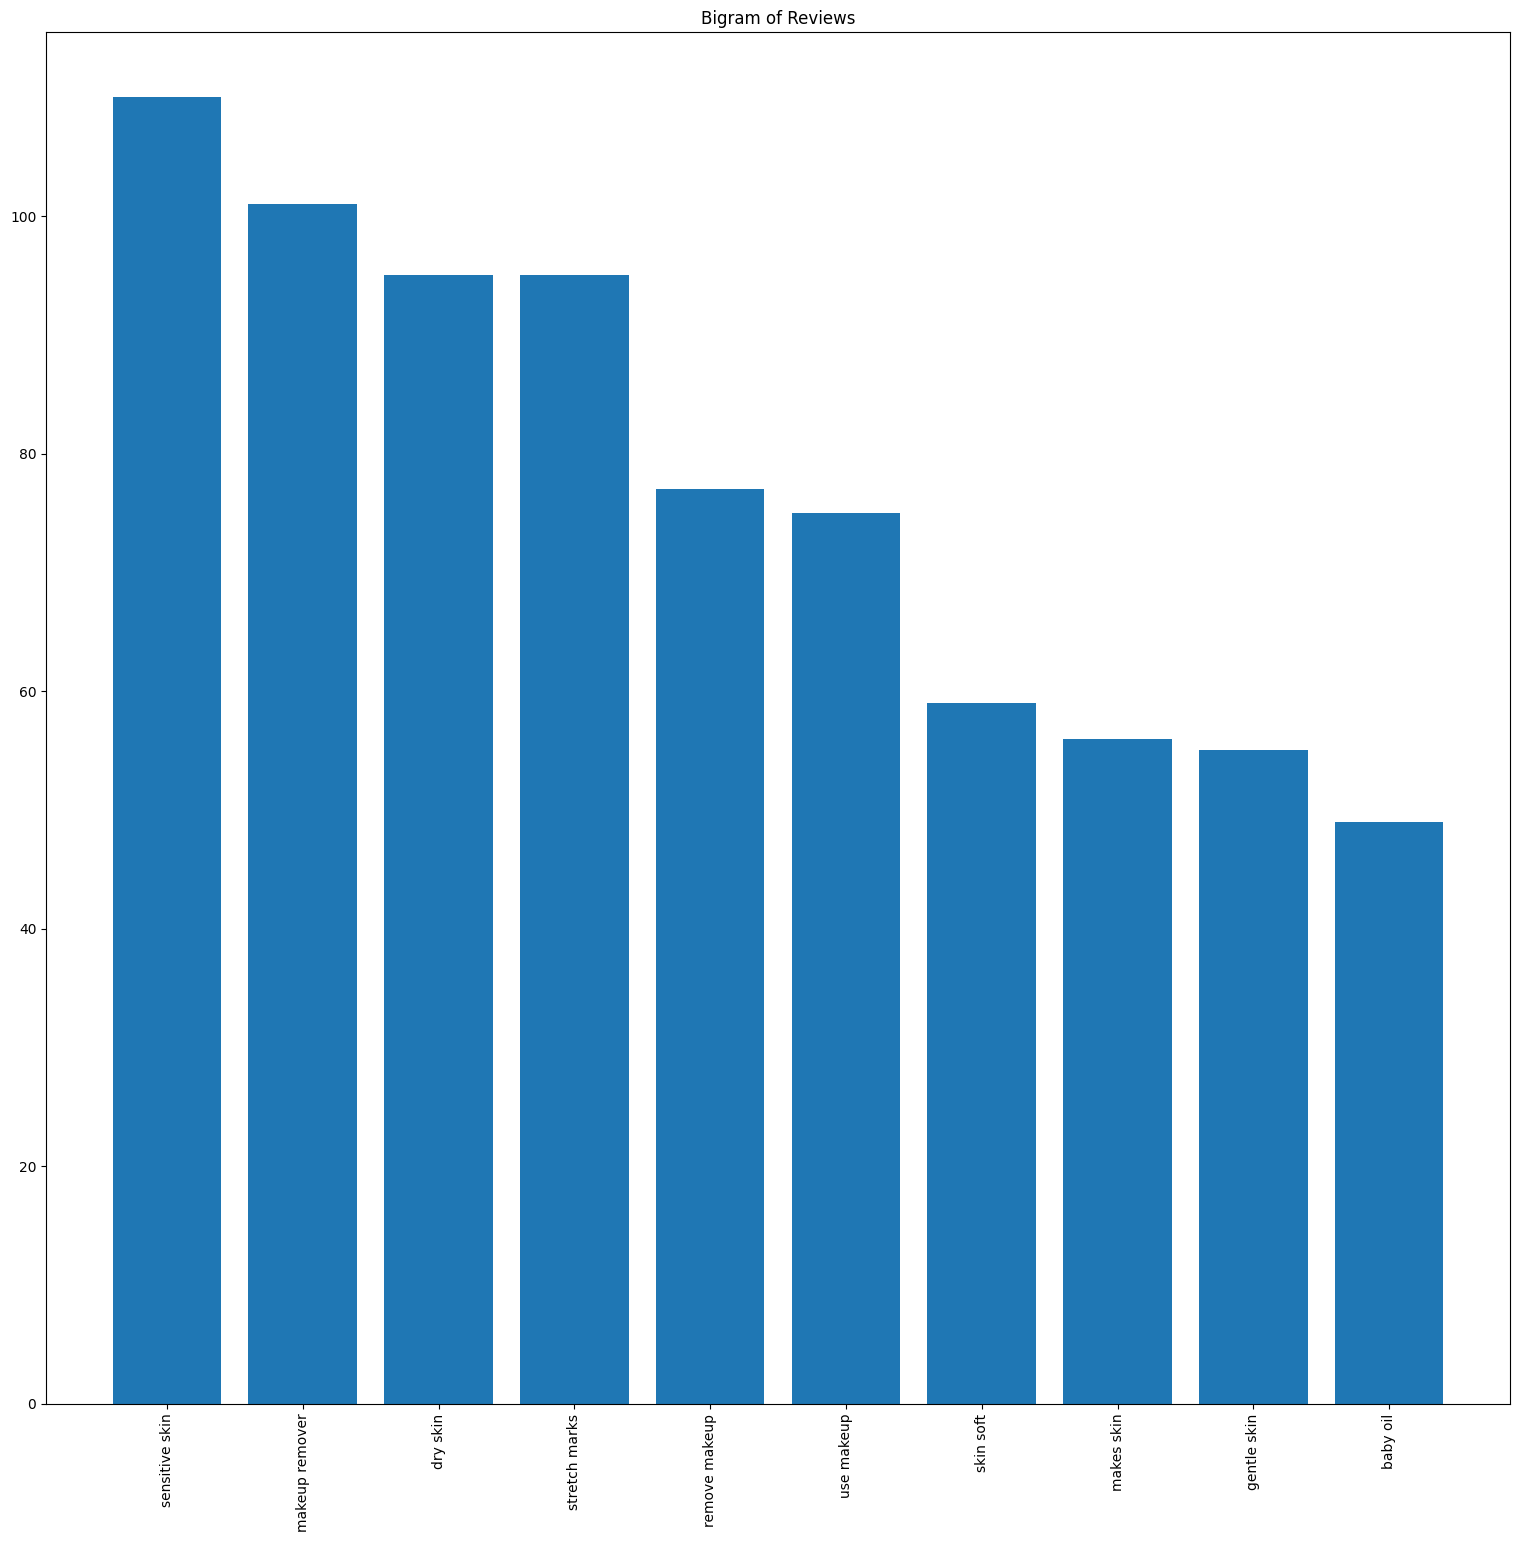

In [144]:
Ngram(df["description_cleaned"],2,title="Bigram of Reviews")

***Bigram of positive review***

,word,frequency
0,sensitive skin,103
1,dry skin,84
2,makeup remover,84
3,stretch marks,82
4,remove makeup,69
5,use makeup,64
6,skin soft,56
7,gentle skin,55
8,makes skin,52
9,good product,45


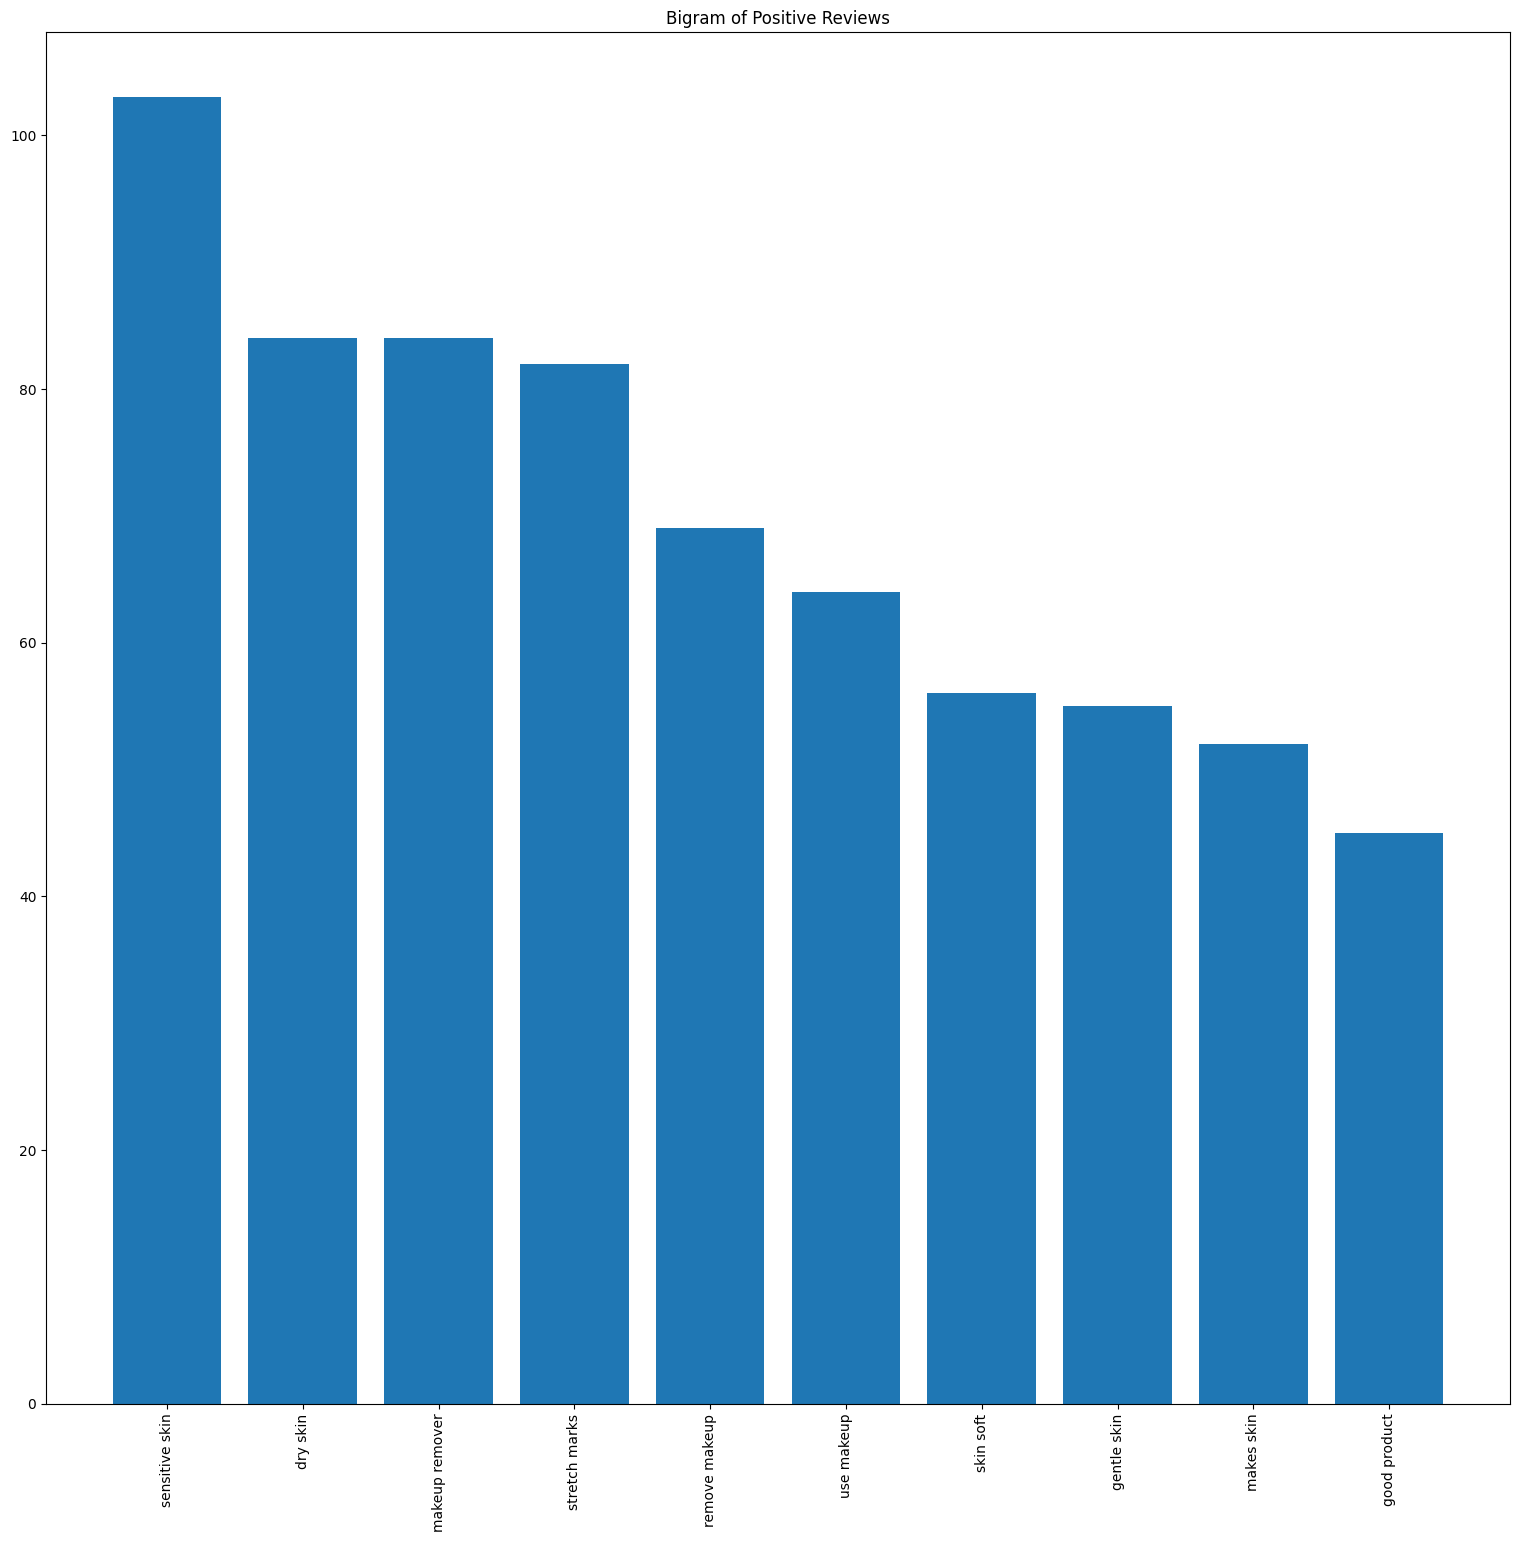

In [145]:
Ngram(df_positive["description_cleaned"],2,title="Bigram of Positive Reviews")

***Bi-grams for Negative Reviewa***

,word,frequency
0,dry skin,11
1,remove makeup,7
2,sensitive skin,7
3,stretch marks,7
4,skin wipes,6
5,baby oil,5
6,last long,5
7,wet wipes,5
8,talking Jhonsons,5
9,Jhonsons Jhonsons,5


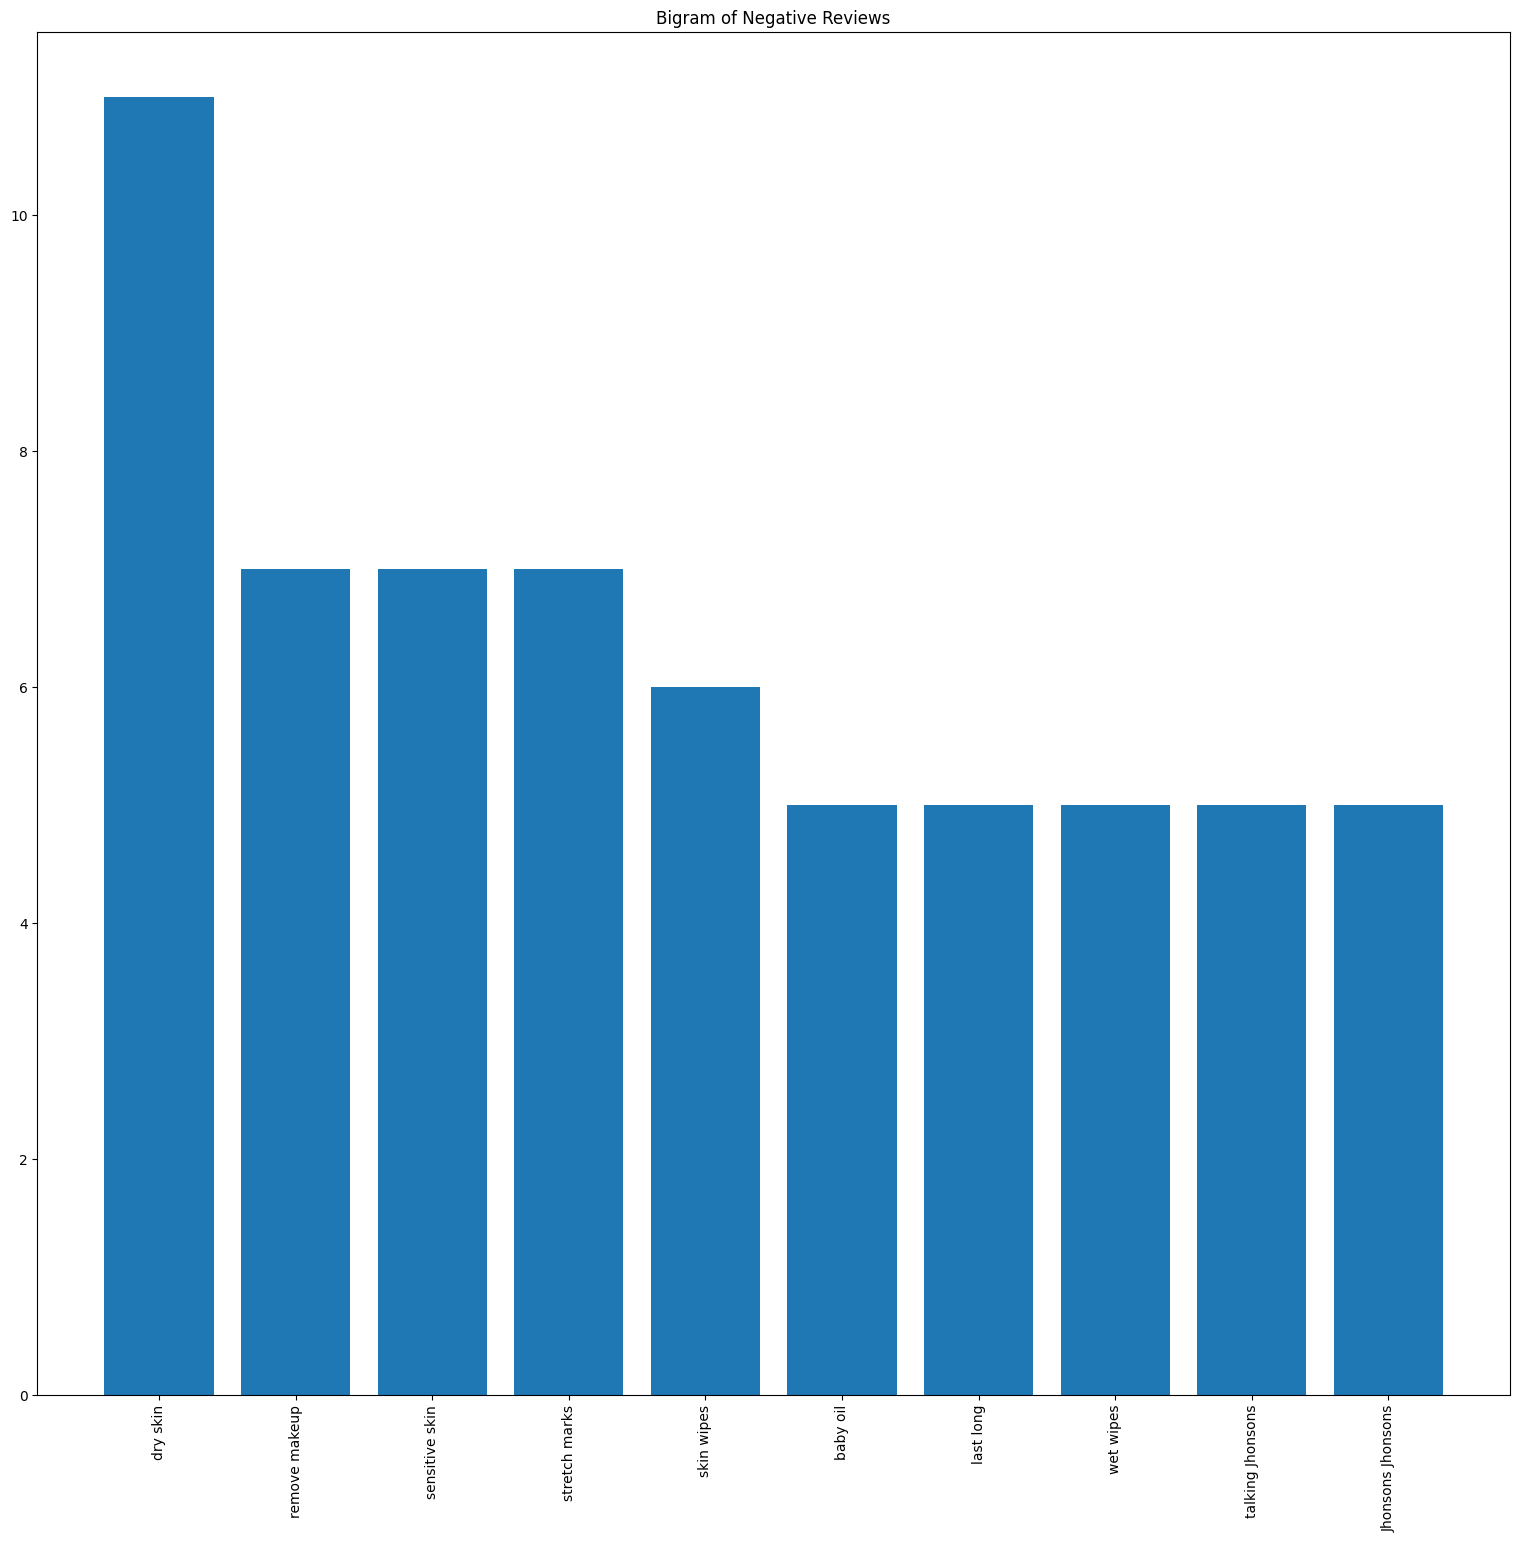

In [146]:
Ngram(df_negative["description_cleaned"],2,title="Bigram of Negative Reviews")